In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
from scipy.stats import poisson
from scipy.special import expit

In [2]:
X = pd.read_csv('X.csv',sep = ',',header=None)
print (X.head())

   0   1   2   3   4   5   6   7   8   9   ...  44  45  46  47  48  49  50  \
0   0   6   6   0   3   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1   2   3   5   0   1   3   2   1   0   9  ...   0   0   0   0   0   1   0   
2   1   0   7   0  12   2   2   1   6   3  ...   1   1   0   0   0   1   0   
3   0   0   0   0   6   0   3   6   3   6  ...   0   0   0   0   0   1   0   
4   0   0   0   0   6   0   3   6   3   6  ...   0   0   0   0   0   1   0   

   51  52  53  
0   8   0   0  
1   4   2   0  
2   3   2   0  
3   1   0   0  
4   1   0   0  

[5 rows x 54 columns]


In [3]:
header = pd.read_csv('README',skiprows=2,header=None,delim_whitespace=True)
print (header.head())

   0        1
0  1     make
1  2  address
2  3      all
3  4       3d
4  5      our


In [4]:
X = pd.read_csv('X.csv',sep = ',',names=list(header[1]))
X

,make,address,all,3d,our,over,remove,internet,order,mail,...,re,edu,table,conference,;,(,[,!,$,#
0,0,6,6,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,8,0,0
1,2,3,5,0,1,3,2,1,0,9,...,0,0,0,0,0,1,0,4,2,0
2,1,0,7,0,12,2,2,1,6,3,...,1,1,0,0,0,1,0,3,2,0
3,0,0,0,0,6,0,3,6,3,6,...,0,0,0,0,0,1,0,1,0,0
4,0,0,0,0,6,0,3,6,3,6,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0,0,12,0,0,0,0,0,0,0,...,0,6,0,0,0,0,0,0,0,0
4596,3,0,6,0,0,3,0,0,0,0,...,3,3,0,0,0,2,0,0,0,0
4597,0,0,0,0,0,0,0,0,0,0,...,0,20,0,0,0,0,0,4,0,0
4598,3,0,3,0,0,0,0,0,0,0,...,0,12,0,0,1,7,0,0,0,0


In [5]:
y = pd.read_csv('y.csv',header=None)
y

,0
0,1
1,1
2,1
3,1
4,1
...,...
4595,0
4596,0
4597,0
4598,0


In [6]:
X['y'] = y
X

,make,address,all,3d,our,over,remove,internet,order,mail,...,edu,table,conference,;,(,[,!,$,#,y
0,0,6,6,0,3,0,0,0,0,0,...,0,0,0,0,0,0,8,0,0,1
1,2,3,5,0,1,3,2,1,0,9,...,0,0,0,0,1,0,4,2,0,1
2,1,0,7,0,12,2,2,1,6,3,...,1,0,0,0,1,0,3,2,0,1
3,0,0,0,0,6,0,3,6,3,6,...,0,0,0,0,1,0,1,0,0,1
4,0,0,0,0,6,0,3,6,3,6,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0,0,12,0,0,0,0,0,0,0,...,6,0,0,0,0,0,0,0,0,0
4596,3,0,6,0,0,3,0,0,0,0,...,3,0,0,0,2,0,0,0,0,0
4597,0,0,0,0,0,0,0,0,0,0,...,20,0,0,0,0,0,4,0,0,0
4598,3,0,3,0,0,0,0,0,0,0,...,12,0,0,1,7,0,0,0,0,0


In [7]:
X_shuffle = X.sample(frac=1).reset_index(drop=True)
X_shuffle

,make,address,all,3d,our,over,remove,internet,order,mail,...,edu,table,conference,;,(,[,!,$,#,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,5,0,6,0,0,0,0,0,2,0,...,0,0,0,0,1,0,1,1,0,0
2,0,0,2,0,0,0,0,0,0,0,...,0,0,0,1,2,1,0,0,0,0
3,2,0,2,0,16,4,1,1,1,1,...,0,0,0,0,1,0,0,2,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
4597,3,0,6,19,2,0,0,0,4,1,...,0,0,0,0,2,0,4,2,1,1
4598,0,0,4,0,11,0,0,0,0,8,...,0,0,0,0,0,0,0,0,0,0


In [8]:
group1 = X_shuffle.iloc[:460,:] 
group2 = X_shuffle.iloc[460:460*2,:] 
group3 = X_shuffle.iloc[460*2:460*3,:] 
group4 = X_shuffle.iloc[460*3:460*4,:] 
group5 = X_shuffle.iloc[460*4:460*5,:] 
group6 = X_shuffle.iloc[460*5:460*6,:] 
group7 = X_shuffle.iloc[460*6:460*7,:] 
group8 = X_shuffle.iloc[460*7:460*8,:] 
group9 = X_shuffle.iloc[460*8:460*9,:] 
group10 = X_shuffle.iloc[460*9:460*10,:]
group = [group1,group2,group3,group4,group5,group6,group7,group8,group9,group10]

In [9]:
def train_test_create(i):
    X_test = group[i].loc[:,group[i-1].columns!="y"]
    y_test = group[i]["y"]
    X_train = pd.DataFrame().reindex(columns=X_shuffle.columns)
    for it in range(len(group)):
        if it == i:
            continue  
        X_train = pd.concat([X_train,group[it]])
    y_train = X_train["y"]
    X_train = X_train.loc[:,group[i-1].columns!="y"]
    X_train = X_train.to_numpy()
    y_train = y_train.to_numpy()
    X_test = X_test.to_numpy()
    y_test = y_test.to_numpy()
    return X_train,y_train,X_test,y_test

In [10]:
def naive_bayes(X_train,y_train):
    pi = np.mean(y_train)
    
    sum_x_id_0 = np.zeros(X_train.shape[1])
    sum_x_id_1 = np.zeros(X_train.shape[1])
    ny_0 = 0
    ny_1 = 0
    for i in range(X_train.shape[0]):
        if y_train[i] == 0:
            sum_x_id_0 += X_train[i,:]
            ny_0 += 1
        else:
            sum_x_id_1 += X_train[i,:]
            ny_1 += 1
    lamda0 = (sum_x_id_0 + 1)/(ny_0 + 1)
    lamda1 = (sum_x_id_1 + 1)/(ny_1 + 1)
    
    return pi,lamda0,lamda1

In [11]:
def predict(X_test,pi,lamda0,lamda1):
    y_pred = np.zeros(X_test.shape[0])
    for j in range(X_test.shape[0]): 
        pi_0 = pi**(0)*(1-pi)**(1-0)
        p1 = poisson.pmf(X_test[j],lamda0)
        prod1 = np.prod(p1) 
        
        pi_1 = pi**(1)*(1-pi)**(1-1)
        p2 = poisson.pmf(X_test[j],lamda1)
        prod2 = np.prod(p2)
        
        y0 = pi_0 * prod1
        y1 = pi_1 * prod2
        if y0 < y1:
            y_pred[j] = 1
        else:
            y_pred[j] = 0
    return y_pred

In [12]:
def plot_stem():
    avg_lamda0 = np.zeros(54)
    avg_lamda1 = np.zeros(54)
    for i in range(10):
        X_train,y_train,X_test,y_test = train_test_create(i)
        pi,lamda0,lamda1 = naive_bayes(X_train,y_train)
        avg_lamda0 += lamda0
        avg_lamda1 += lamda1
    avg_lamda0 = avg_lamda0 / 10
    avg_lamda1 = avg_lamda1 / 10
    x = np.linspace(1,54,num =54)
    plt.stem(x,avg_lamda0,use_line_collection=True)
    plt.xlabel("Dimension")
    plt.ylabel("Avg lamda value for y=0")
    plt.show()
    plt.close()
    plt.stem(x,avg_lamda1,use_line_collection=True)
    plt.xlabel("Dimension")
    plt.ylabel("Avg lamda value for y=1")
    plt.show()
    plt.close()

In [13]:
def accuracy():
    c00 = 0
    c01 = 0
    c11 = 0
    c10 = 0
    for i in range(10):
        X_train,y_train,X_test,y_test = train_test_create(i)
        pi,lamda0,lamda1 = naive_bayes(X_train,y_train)
        y_pred = predict(X_test,pi,lamda0,lamda1)
        for j in range(y_pred.shape[0]):
            if y_pred[j] == 0 and y_test[j] == 0:
                c00 += 1
            elif y_pred[j] == 0 and y_test[j] == 1:
                c10 += 1
            elif y_pred[j] == 1 and y_test[j] == 0:
                c01 += 1
            else:
                c11 += 1
    return c00,c01,c10,c11

In [257]:
def sigma_i(weights,i,X):
    return expit(X[i].T @ weights)

In [74]:
def steepest_ascent():
    iters = 1000
    fig, axs = plt.subplots(2, 5, sharex=True, sharey=True)
    for its in range(10):
        X_train,y_train,X_test,y_test = train_test_create(its)
        y_train[y_train == 0] = -1
        y_test[y_test == 0] = -1
        X_train = np.column_stack((X_train,np.ones(X_train.shape[0])))
        X_test = np.column_stack((X_test,np.ones(X_test.shape[0])))
        weights = np.zeros(X_train.shape[1]).reshape(-1,1)
        objective = []
        for it in range(iters):
            eta = 0.01 / 4600
            sigma_i = expit(y_train.reshape(-1,1) * (X_train @ weights))
            objective.append(np.sum(np.log(sigma_i)))
            update = X_train.T @ (y_train.reshape(-1,1) * (1-sigma_i))
            weights += eta*update
        axs[math.floor(its/5),its%5].plot(range(iters),objective)
        axs[math.floor(its/5),its%5].set_title(its)
    fig.text(0.5, 0.04, 'iterations', ha='center')
    fig.text(0.0004, 0.5, "objective function", va='center', rotation='vertical')

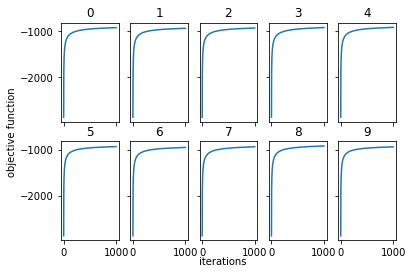

In [75]:
steepest_ascent()

In [187]:
def steepest_ascent():
    iters = 1000
    fig, axs = plt.subplots(2, 5, sharex=True, sharey=True)
    for its in range(10):
        X_train,y_train,X_test,y_test = train_test_create(its)
        y_train[y_train == 0] = -1
        y_test[y_test == 0] = -1
        X_train = np.column_stack((X_train,np.ones(X_train.shape[0])))
        X_test = np.column_stack((X_test,np.ones(X_test.shape[0])))
        weights = np.zeros(X_train.shape[1]).reshape(-1,1)
        objective = []
        for it in range(iters):
            eta = 0.01 / 4600
            sum_tmp1 = np.zeros(X_train.shape[1]).reshape(-1,1)
            objective_function = 0
            for i in range(y_train.shape[0]):
                sum_tmp1 += ((1 - sigma_i(y_train[i]*weights,i,X_train))*y_train[i]* X_train[i]).reshape(-1,1)
                objective_function += np.log(sigma_i(y_train[i]*weights,i,X_train))
            weights += eta * sum_tmp1
            objective.append(objective_function)
        
        axs[math.floor(its/5),its%5].plot(range(iters),objective)
        axs[math.floor(its/5),its%5].set_title(its)
    fig.text(0.5, 0.04, 'iterations', ha='center')
    fig.text(0.0004, 0.5, "objective function", va='center', rotation='vertical')

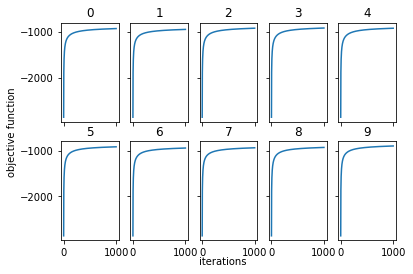

In [188]:
steepest_ascent()

In [ ]:
''' 
            sum_tmp1 = np.zeros(X_train.shape[1]).reshape(-1,1)
            sum_tmp2 = 0
            objective_function = 0
            for i in range(y_train.shape[0]):
                sum_tmp1 += ((1 - sigma_i(y_train[i]*weights,i,X_train))*y_train[i]* X_train[i]).reshape(-1,1)
                sum_tmp2 += sigma_i(weights,i,X_train)*(1-sigma_i(weights,i,X_train)) * X_train[i] @ X_train[i].T
                objective_function += np.log(sigma_i(y_train[i]*weights,i,X_train))
            weights -= eta / sum_tmp2 * sum_tmp1
            objective.append(objective_function)
            '''

In [82]:
def newton():
    iters = 100
    fig, axs = plt.subplots(2, 5, sharex=True, sharey=True)
    c00 = 0
    c01 = 0
    c11 = 0
    c10 = 0
    for its in range(10):
        X_train,y_train,X_test,y_test = train_test_create(its)
        y_train[y_train == 0] = -1
        y_test[y_test == 0] = -1
        X_train = np.column_stack((X_train,np.ones(X_train.shape[0])))
        X_test = np.column_stack((X_test,np.ones(X_test.shape[0])))
        weights = np.zeros(X_train.shape[1]).reshape(-1,1)
        objective = []
        for it in range(iters):
            eta = 0.01 / 4600
            sigma_i = expit(y_train.reshape(-1,1) * (X_train @ weights))
            objective.append(np.sum(np.log(sigma_i)))
            second_grad = -(sigma_i*(1-sigma_i)*X_train).T @ (X_train)
            first_grad = X_train.T @ (y_train.reshape(-1,1)*(1-sigma_i))
            weights -= eta*np.linalg.inv(second_grad).dot(first_grad)
            
        axs[math.floor(its/5),its%5].plot(range(iters),objective)
        axs[math.floor(its/5),its%5].set_title(its)
        y_pred = np.sign(X_test @ weights)
        for j in range(y_pred.shape[0]):
            if y_pred[j] == 0 and y_test[j] == 0:
                c00 += 1
            elif y_pred[j] == 0 and y_test[j] == 1:
                c10 += 1
            elif y_pred[j] == 1 and y_test[j] == 0:
                c01 += 1
            else:
                c11 += 1
    fig.text(0.5, 0.04, 'iterations', ha='center')
    fig.text(0.0004, 0.5, "objective function", va='center', rotation='vertical')
    return (c00,c01,c10,c11)

(0, 0, 0, 4600)

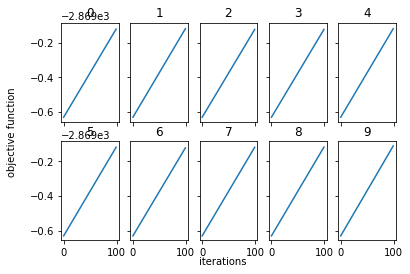

In [83]:
newton()

In [202]:
sigma_i = expit(np.multiply(y_train,X_train.dot(weights)))
sigma_i.shape

(4140,)

In [207]:
X_train.shape

(4140, 55)

In [214]:
(sigma_i * (1-sigma_i)).shape

(4140,)

In [209]:
X_train.T.dot(np.multiply(y_train,1-sigma_i)).shape

(55,)

In [211]:
sigma_i * (1-sigma_i)

array([0.25, 0.25, 0.25, ..., 0.25, 0.25, 0.25])

In [223]:
np.multiply(np.multiply(sigma_i,1-sigma_i).reshape((4140,1)),X_train).shape

(4140, 55)

In [221]:
np.multiply(sigma_i,1-sigma_i).reshape((4140,1)).shape

(4140, 1)

In [220]:
X_train.shape

(4140, 55)

In [225]:
np.multiply(np.multiply(sigma_i,1-sigma_i).reshape((4140,1)),X_train).T.dot(X_train).shape

(55, 55)

In [232]:
np.multiply(sigma_i,1-sigma_i).reshape((4140,1))

array([[0.25],
       [0.25],
       [0.25],
       ...,
       [0.25],
       [0.25],
       [0.25]])

In [234]:
sigma_i = expit(np.multiply(y_train,X_train.dot(weights)))
np.multiply(np.multiply(sigma_i,1-sigma_i).reshape((4140,1)),X_train)

array([[ 0.  , 35.75,  0.  , ...,  0.  ,  0.  ,  0.25],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.25],
       [ 0.  ,  0.  ,  0.5 , ...,  0.  ,  0.75,  0.25],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.25],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.25],
       [ 2.  ,  1.  ,  2.  , ...,  0.5 ,  0.25,  0.25]])

In [243]:
np.multiply(sigma_i,1-sigma_i).reshape((4140,1))

array([[0.25],
       [0.25],
       [0.25],
       ...,
       [0.25],
       [0.25],
       [0.25]])

In [248]:
sigma_i.shape

(4140,)

In [250]:
np.multiply(y_train,X_train.dot(weights)).shape

(4140,)

In [251]:
weights = np.zeros(X_train.shape[1]).reshape(-1,1)
np.multiply(y_train,X_train.dot(weights)).shape

(4140, 4140)

In [252]:
weights.shape

(55, 1)

In [254]:
X_train.dot(weights).shape

(4140, 1)

In [84]:
(2649+1423)/4600

0.8852173913043478

In [85]:
(2296+1703)/4600

0.8693478260869565